In [37]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plyt
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point, LineString

In [2]:
df = pd.read_csv('merged.csv')

print(df)

       longitude   latitude                  timestamp   xacc   yacc  speed  \
0     149.001999 -35.762268  2022-01-03T12:49:36+11:00 -0.622 -0.255   29.0   
1     149.054108 -35.326000  2020-07-01T12:17:01+10:00  1.394 -0.600   64.0   
2     149.063189 -35.320256  2023-01-25T17:32:38+11:00 -1.114  0.017   27.0   
3     149.062775 -35.320061  2021-06-23T17:33:19+10:00 -0.976  0.396   17.0   
4     149.062378 -35.313324  2021-03-04T08:55:16+11:00 -0.896  0.003   67.0   
...          ...        ...                        ...    ...    ...    ...   
6694  149.289459 -35.336906  2020-10-27T04:06:31+11:00 -0.112 -0.421   94.0   
6695  149.289154 -35.336918  2022-02-07T06:43:09+11:00 -0.078 -0.428   93.0   
6696  149.290756 -35.337002  2020-12-11T21:29:54+11:00 -0.409 -0.058   87.0   
6697  149.274216 -35.346287  2021-01-21T15:10:31+11:00 -0.057 -0.404  107.0   
6698  149.409001 -35.305583  2022-12-06T06:35:53+11:00 -0.180 -0.364   97.0   

      maxspeed  lanecount classification  
0       

In [3]:
df.head()

,longitude,latitude,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification
0,149.001999,-35.762268,2022-01-03T12:49:36+11:00,-0.622,-0.255,29.0,62.0,1,Braking
1,149.054108,-35.326000,2020-07-01T12:17:01+10:00,1.394,-0.600,64.0,83.0,4,Steering
2,149.063189,-35.320256,2023-01-25T17:32:38+11:00,-1.114,0.017,27.0,48.0,2,Braking
3,149.062775,-35.320061,2021-06-23T17:33:19+10:00,-0.976,0.396,17.0,22.0,1,Braking
4,149.062378,-35.313324,2021-03-04T08:55:16+11:00,-0.896,0.003,67.0,95.0,2,Braking


In [4]:
df.classification.unique()

array(['Braking', 'Steering', 'Combined'], dtype=object)

In [5]:
df.lanecount.unique()

array([1, 4, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
lanecountClass = df[["lanecount", "classification"]].copy()
lanecountClass

,lanecount,classification
0,1,Braking
1,4,Steering
2,2,Braking
3,1,Braking
4,2,Braking
...,...,...
6694,1,Steering
6695,1,Steering
6696,1,Braking
6697,2,Steering


In [7]:
df['xacc'].describe()

count    6699.000000
mean       -0.301323
std         0.340357
min        -1.962000
25%        -0.619000
50%        -0.257000
75%        -0.090000
max         1.714000
Name: xacc, dtype: float64

In [8]:
df['yacc'].describe()

count    6699.000000
mean        0.041516
std         0.488534
min        -1.096000
25%        -0.519000
50%         0.007000
75%         0.601000
max         1.052000
Name: yacc, dtype: float64

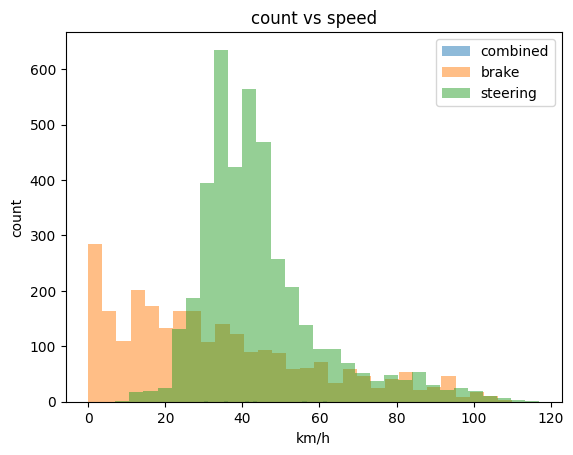

In [9]:
#occurences vs speed histogram, separated by classification
combined_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["speed"], bins=30, alpha=0.5, label="combined")

brake_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["speed"], bins=30, alpha=0.5, label="brake")

steering_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["speed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs speed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()


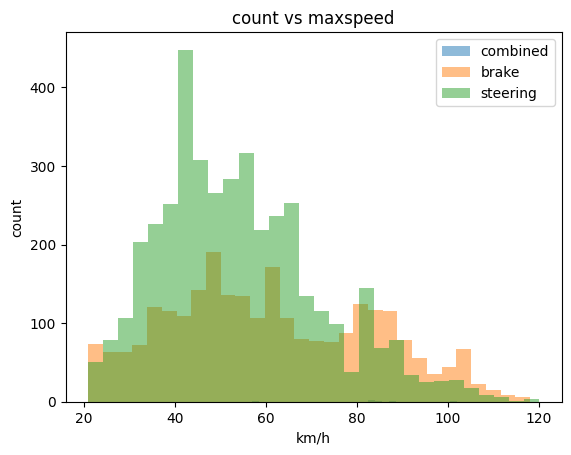

In [10]:
#occurences vs max speed histogram, separated by classification
combined_max_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["maxspeed"], bins=30, alpha=0.5, label="combined")

brake_max_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["maxspeed"], bins=30, alpha=0.5, label="brake")

steering_max_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["maxspeed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs maxspeed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()

In [11]:
#xacc vs yacc
XYacc = px.scatter(df, x="xacc", y="yacc", color="classification", title="Xacc v Yacc")
XYacc.show()

In [12]:
#xacc vs yacc vs speed
def kmh_to_ms(x):
    return x / 3.6


df_converted = df.assign(speed_ms=lambda x: kmh_to_ms(x['speed']),
                         max_speed_ms=lambda x: kmh_to_ms(x['maxspeed']))

XYacc_Speed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="speed_ms", color="classification", title="Xacc v Yacc v Speed")
XYacc_Speed.show()

In [13]:
#xacc vs yacc vs maxspeed
XYacc_Maxspeed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="max_speed_ms", color="classification", title="Xacc v Yacc v Max Speed")
XYacc_Maxspeed.show()

In [14]:
#braking only (speed)
brake_xyacc_speed = px.scatter_3d(brake_speed_count, x="xacc", y="yacc", z="speed", color="speed", title="Xacc v Yacc v Speed (Brake)")
brake_xyacc_speed.show()

In [15]:
#braking only (max speed)
brake_xyacc_maxspeed = px.scatter_3d(brake_speed_count, x="xacc", y="yacc", z="maxspeed", color="maxspeed", title="Xacc v Yacc v Max Speed (Brake)")
brake_xyacc_maxspeed.show()

In [16]:
#steering only
steering_xyacc_speed = px.scatter_3d(steering_speed_count, x="xacc", y="yacc", z="speed", color="yacc", title="Xacc v Yacc v Speed (Steering)")
steering_xyacc_speed.show()

In [17]:
#load geojson data
road_reserve_geojson_data = gpd.read_file('ACTGOV_ROAD_RESERVES.geojson')

In [18]:
road_reserve_geojson_data.head()

,OBJECTID,ID,ROAD_ID,ROAD_NAME,HIERARCHY_ID,ROAD_HIERARCHY,DIVISION_CODE,DIVISION_NAME,DIVISION_SHORT,DISTRICT_CODE,DISTRICT_NAME,DISTRICT_SHORT,CURRENT_LIFECYCLE_STAGE,GlobalID,Shape__Area,Shape__Length,geometry
0,1,52078,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,a29bd220-47a3-4666-aa60-648b9d78e13f,8330.097412,563.997962,"POLYGON ((149.10189 -35.36227, 149.10175 -35.3..."
1,2,52079,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,3fea6088-7e9a-45d8-87bb-7bd21a28a963,2465.538818,214.168526,"POLYGON ((149.10311 -35.36264, 149.10305 -35.3..."
2,3,52080,4603,WILKINS STREET,8A,URBAN RESIDENTIAL 1,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,6d1b2b28-d29c-4339-829b-179af9bf64ef,6326.078857,516.156248,"POLYGON ((149.09855 -35.36795, 149.09909 -35.3..."
3,4,52081,4603,WILKINS STREET,8A,URBAN RESIDENTIAL 1,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,c0f4c860-864a-4581-a548-7ac7575484f4,3088.946533,280.652299,"POLYGON ((149.09953 -35.37120, 149.09928 -35.3..."
4,5,52082,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,ac2bab1a-f6dc-4155-b1c1-ef8fc9bfe895,5748.540283,409.974189,"POLYGON ((149.10523 -35.36256, 149.10463 -35.3..."


In [19]:
road_edge_geojson_data = gpd.read_file('ACTGOV_ROAD_EDGES.geojson')

In [20]:
road_edge_geojson_data.head()

,OBJECTID,ID,ROAD_ID,ROAD_NAME,DIVISION_NAME,DIVISION_CODE,DIVISION_SHORT,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_SHORT,EDGE_LIFECYLE_STAGE,ROAD_LIFECYCLE_STAGE,NAME_CURRENT_LIFECYCLE_STAGE,SEALED,SOURCE_SCALE,DATA_SOURCE,ENTRY_METHOD,GlobalID,Shape__Length,geometry
0,1,76465,NaN,NaN,ACTON,107.0,ACTO,CANBERRA CENTRAL,1,CANB,OPERATIONAL,NaN,NaN,NO,UNKNOWN,2016 AAM aerial photography,SCREEN DIGITISING,1f214f7c-8696-4677-bdba-dc75d75299b3,86.096512,"LINESTRING (149.11298 -35.28243, 149.11299 -35..."
1,2,76466,NaN,NaN,ACTON,107.0,ACTO,CANBERRA CENTRAL,1,CANB,OPERATIONAL,NaN,NaN,NO,UNKNOWN,2016 AAM aerial photography,SCREEN DIGITISING,a153e98b-ab6f-42da-8cb0-81c417c47e3c,100.817367,"LINESTRING (149.11312 -35.28246, 149.11311 -35..."
2,3,61916,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,c4f0469e-bc48-41f9-9019-b2aa1dd47b33,651.061144,"LINESTRING (149.01099 -35.31147, 149.01101 -35..."
3,4,61917,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,38c0fbea-12d0-4c51-ab41-30b24c7351a2,313.176921,"LINESTRING (149.00916 -35.30669, 149.00930 -35..."
4,5,61918,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,ace1f2c6-cf16-46aa-806e-a7b0c651290f,110.781776,"LINESTRING (149.01051 -35.31240, 149.01060 -35..."


In [62]:
accident_geojson = gpd.read_file('merged.geojson')

In [63]:
accident_geojson

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,geometry
0,2022-01-03 01:49:36+00:00,-0.622,-0.255,29,62,1,Braking,POINT (149.00200 -35.76227)
1,2020-07-01 02:17:01+00:00,1.394,-0.600,64,83,4,Steering,POINT (149.05411 -35.32600)
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (149.06319 -35.32026)
3,2021-06-23 07:33:19+00:00,-0.976,0.396,17,22,1,Braking,POINT (149.06277 -35.32006)
4,2021-03-03 21:55:16+00:00,-0.896,0.003,67,95,2,Braking,POINT (149.06238 -35.31332)
...,...,...,...,...,...,...,...,...
6694,2020-10-26 17:06:31+00:00,-0.112,-0.421,94,101,1,Steering,POINT (149.28946 -35.33691)
6695,2022-02-06 19:43:09+00:00,-0.078,-0.428,93,101,1,Steering,POINT (149.28915 -35.33692)
6696,2020-12-11 10:29:54+00:00,-0.409,-0.058,87,104,1,Braking,POINT (149.29076 -35.33700)
6697,2021-01-21 04:10:31+00:00,-0.057,-0.404,107,113,2,Steering,POINT (149.27422 -35.34629)


In [23]:
#get bound range
bounds1 = road_edge_geojson_data.total_bounds
bounds2 = road_reserve_geojson_data.total_bounds

#combine bounds
combined_bound = [min(bounds1[0], bounds2[0]), min(bounds1[1], bounds2[1]),
          max(bounds1[2], bounds2[2]), max(bounds1[3], bounds2[3])]

print(f'bounds1: {bounds1}')
print(f'bounds2: {bounds2}')
print(f'this is the combined bounds: {combined_bound}')

bounds1: [148.76361963 -35.89301064 149.39727619 -35.13952662]
bounds2: [121.48868763 -83.98975814 149.39777927 -35.13943525]
this is the combined bounds: [121.488687632489, -83.989758136275, 149.397779267416, -35.1394352544261]


In [40]:
#map centred around canberra
canberra_bounds = (-35.2809, 149.1300)
folium_map = folium.Map(location=canberra_bounds, zoom_start=12)
test_map = folium_map
folium_map.save('map.html')

In [25]:
#add geojson data to map
#folium.GeoJson(road_edge_geojson_data).add_to(folium_map)
#folium.GeoJson(road_reserve_geojson_data).add_to(folium_map)

In [26]:
#add merged data to map
"""
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(test_map)
"""


"\nfor index, row in df.iterrows():\n    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(test_map)\n"

In [27]:
heat_data = df[['latitude', 'longitude']].values.tolist()

In [28]:
HeatMap(heat_data).add_to(test_map)

In [29]:
test_map

In [44]:
#test_map.save('test.html')
#folium_map.save('geomap.html')

In [91]:
accident_geojson.crs
# cartesian to meters

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
changed_acc = accident_geojson.to_crs(3857)
changed_roadedge = road_edge_geojson_data.to_crs(3857)
changed_roadreserve = road_reserve_geojson_data.to_crs(3857)

In [107]:
changed_acc.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [108]:
changed_roadedge.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [113]:
changed_roadreserve.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [114]:
#https://www.youtube.com/watch?v=y85IKthrV-s

In [115]:
edge_joined_gdf = gpd.sjoin_nearest(changed_acc, changed_roadedge, distance_col='distances', how='left', rsuffix='_road')

In [116]:
edge_joined_gdf

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,geometry,index__road,OBJECTID,...,EDGE_LIFECYLE_STAGE,ROAD_LIFECYCLE_STAGE,NAME_CURRENT_LIFECYCLE_STAGE,SEALED,SOURCE_SCALE,DATA_SOURCE,ENTRY_METHOD,GlobalID,Shape__Length,distances
0,2022-01-03 01:49:36+00:00,-0.622,-0.255,29,62,1,Braking,POINT (16586826.656 -4267958.929),1610,1639,...,OPERATIONAL,ENTERED,EFFECTIVE,NO,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,09871327-bfbc-4a18-ab5a-210807713c46,7952.344620,2.968227
1,2020-07-01 02:17:01+00:00,1.394,-0.600,64,83,4,Steering,POINT (16592627.403 -4208271.967),37146,38029,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,2015 RPS LIDAR aerial photography,SCREEN DIGITISING,455f9899-a8ec-4a46-baed-67a28801b0c2,1205.945085,8.386962
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),37404,38306,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,NaN,VARIOUS,NaN,f7747b49-9c7b-47b3-98ce-67c382c7fa91,82.458588,2.518186
3,2021-06-23 07:33:19+00:00,-0.976,0.396,17,22,1,Braking,POINT (16593592.209 -4207461.669),38802,39822,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,"MAP, PLAN DRAWING OR DIAGRAM",SCREEN DIGITISING,7a57600c-a67f-474b-aea6-b09b2f2f2b4c,529.443601,3.256400
4,2021-03-03 21:55:16+00:00,-0.896,0.003,67,95,2,Braking,POINT (16593548.015 -4206542.567),34432,35228,...,OPERATIONAL,ENTERED,GAZETTED,YES,UNKNOWN,RASTER,SCREEN DIGITISING,9b013a7f-48a7-4da2-8cbe-d2b1d7a37005,2983.355455,3.727888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,2020-10-26 17:06:31+00:00,-0.112,-0.421,94,101,1,Steering,POINT (16618826.557 -4209760.102),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3461.628936
6695,2022-02-06 19:43:09+00:00,-0.078,-0.428,93,101,1,Steering,POINT (16618792.604 -4209761.740),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3439.161524
6696,2020-12-11 10:29:54+00:00,-0.409,-0.058,87,104,1,Braking,POINT (16618970.938 -4209773.202),33940,34719,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,f5826dfa-1ae0-4b14-a282-8b1109d87abc,374.539072,3386.242706
6697,2021-01-21 04:10:31+00:00,-0.057,-0.404,107,113,2,Steering,POINT (16617129.714 -4211040.310),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3727.204652


In [117]:
"""
some accident points link to other roads - not just one road only
"""
edge_joined_gdf

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,geometry,index__road,OBJECTID,...,EDGE_LIFECYLE_STAGE,ROAD_LIFECYCLE_STAGE,NAME_CURRENT_LIFECYCLE_STAGE,SEALED,SOURCE_SCALE,DATA_SOURCE,ENTRY_METHOD,GlobalID,Shape__Length,distances
0,2022-01-03 01:49:36+00:00,-0.622,-0.255,29,62,1,Braking,POINT (16586826.656 -4267958.929),1610,1639,...,OPERATIONAL,ENTERED,EFFECTIVE,NO,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,09871327-bfbc-4a18-ab5a-210807713c46,7952.344620,2.968227
1,2020-07-01 02:17:01+00:00,1.394,-0.600,64,83,4,Steering,POINT (16592627.403 -4208271.967),37146,38029,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,2015 RPS LIDAR aerial photography,SCREEN DIGITISING,455f9899-a8ec-4a46-baed-67a28801b0c2,1205.945085,8.386962
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),37404,38306,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,NaN,VARIOUS,NaN,f7747b49-9c7b-47b3-98ce-67c382c7fa91,82.458588,2.518186
3,2021-06-23 07:33:19+00:00,-0.976,0.396,17,22,1,Braking,POINT (16593592.209 -4207461.669),38802,39822,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,"MAP, PLAN DRAWING OR DIAGRAM",SCREEN DIGITISING,7a57600c-a67f-474b-aea6-b09b2f2f2b4c,529.443601,3.256400
4,2021-03-03 21:55:16+00:00,-0.896,0.003,67,95,2,Braking,POINT (16593548.015 -4206542.567),34432,35228,...,OPERATIONAL,ENTERED,GAZETTED,YES,UNKNOWN,RASTER,SCREEN DIGITISING,9b013a7f-48a7-4da2-8cbe-d2b1d7a37005,2983.355455,3.727888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,2020-10-26 17:06:31+00:00,-0.112,-0.421,94,101,1,Steering,POINT (16618826.557 -4209760.102),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3461.628936
6695,2022-02-06 19:43:09+00:00,-0.078,-0.428,93,101,1,Steering,POINT (16618792.604 -4209761.740),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3439.161524
6696,2020-12-11 10:29:54+00:00,-0.409,-0.058,87,104,1,Braking,POINT (16618970.938 -4209773.202),33940,34719,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,f5826dfa-1ae0-4b14-a282-8b1109d87abc,374.539072,3386.242706
6697,2021-01-21 04:10:31+00:00,-0.057,-0.404,107,113,2,Steering,POINT (16617129.714 -4211040.310),33867,34645,...,OPERATIONAL,ENTERED,EFFECTIVE,YES,UNKNOWN,PHOTOGRAMMETRY,SCREEN DIGITISING,0a0341b9-e56e-4f00-b0bc-f84a80ed9daf,5643.759615,3727.204652


In [118]:
edge_joined_gdf.DISTRICT_NAME.value_counts()

BELCONNEN           1903
CANBERRA CENTRAL    1439
GUNGAHLIN            884
TUGGERANONG          842
WODEN VALLEY         409
MOLONGLO VALLEY      302
MAJURA               302
JERRABOMBERRA        251
WESTON CREEK         208
PADDYS RIVER          75
KOWEN                 59
COREE                 38
STROMLO               13
COTTER RIVER           8
TENNENT                8
HALL                   4
BOOTH                  2
Name: DISTRICT_NAME, dtype: int64

In [120]:
edge_joined_gdf.to_csv('edge_joinedv2.csv',index=False)

In [121]:
reserve_joined_gdf = gpd.sjoin_nearest(changed_acc, changed_roadreserve, distance_col='distances', how='left', rsuffix='_road')

In [122]:
reserve_joined_gdf

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,geometry,index__road,OBJECTID,...,DIVISION_NAME,DIVISION_SHORT,DISTRICT_CODE,DISTRICT_NAME,DISTRICT_SHORT,CURRENT_LIFECYCLE_STAGE,GlobalID,Shape__Area,Shape__Length,distances
0,2022-01-03 01:49:36+00:00,-0.622,-0.255,29,62,1,Braking,POINT (16586826.656 -4267958.929),21269,21329,...,NaN,NaN,18.0,BOOTH,BOOT,GAZETTED,0874c16a-2fa9-445a-b3c1-79a034b72d96,160161.629639,15988.599700,0.000000
1,2020-07-01 02:17:01+00:00,1.394,-0.600,64,83,4,Steering,POINT (16592627.403 -4208271.967),20854,20901,...,NaN,NaN,4.0,WESTON CREEK,WEST,GAZETTED,5fe51a17-7211-40a7-9cf7-a7ff84aa4629,6398.632324,354.027908,0.000000
1,2020-07-01 02:17:01+00:00,1.394,-0.600,64,83,4,Steering,POINT (16592627.403 -4208271.967),20853,20900,...,NaN,NaN,4.0,WESTON CREEK,WEST,GAZETTED,15aa76e2-62e3-4905-861f-431059385193,6398.632324,354.027908,0.000000
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),21412,21472,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,0364972d-310f-4b94-b9b2-a9f5843553b8,15039.441650,554.101552,0.000000
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),21413,21473,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,b6eafe7b-28c1-4612-99bd-26b794412eb7,15039.441650,554.101552,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,2020-10-26 17:06:31+00:00,-0.112,-0.421,94,101,1,Steering,POINT (16618826.557 -4209760.102),38079,38282,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,439a8c20-3042-441d-87f2-b471e0b4e6f3,41365.727295,1979.964792,3508.308199
6695,2022-02-06 19:43:09+00:00,-0.078,-0.428,93,101,1,Steering,POINT (16618792.604 -4209761.740),38079,38282,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,439a8c20-3042-441d-87f2-b471e0b4e6f3,41365.727295,1979.964792,3542.235881
6696,2020-12-11 10:29:54+00:00,-0.409,-0.058,87,104,1,Braking,POINT (16618970.938 -4209773.202),38079,38282,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,439a8c20-3042-441d-87f2-b471e0b4e6f3,41365.727295,1979.964792,3363.780585
6697,2021-01-21 04:10:31+00:00,-0.057,-0.404,107,113,2,Steering,POINT (16617129.714 -4211040.310),20650,20693,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,95122cad-4ed9-4c0d-a658-ffb20f089d1f,7023.570557,1416.492427,3866.257270


In [123]:
reserve_joined_gdf.to_csv('reserve_joinedv2.csv',index=False)

In [127]:
brake_reserve = reserve_joined_gdf[reserve_joined_gdf['classification']=='Braking']
steer_reserve = reserve_joined_gdf[reserve_joined_gdf['classification']=='Steering']

brake_edge = edge_joined_gdf[edge_joined_gdf['classification']=='Braking']
steer_edge = edge_joined_gdf[edge_joined_gdf['classification']=='Steering']

In [128]:
brake_reserve

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,geometry,index__road,OBJECTID,...,DIVISION_NAME,DIVISION_SHORT,DISTRICT_CODE,DISTRICT_NAME,DISTRICT_SHORT,CURRENT_LIFECYCLE_STAGE,GlobalID,Shape__Area,Shape__Length,distances
0,2022-01-03 01:49:36+00:00,-0.622,-0.255,29,62,1,Braking,POINT (16586826.656 -4267958.929),21269,21329,...,NaN,NaN,18.0,BOOTH,BOOT,GAZETTED,0874c16a-2fa9-445a-b3c1-79a034b72d96,160161.629639,15988.599700,0.000000
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),21412,21472,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,0364972d-310f-4b94-b9b2-a9f5843553b8,15039.441650,554.101552,0.000000
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),21413,21473,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,b6eafe7b-28c1-4612-99bd-26b794412eb7,15039.441650,554.101552,0.000000
2,2023-01-25 06:32:38+00:00,-1.114,0.017,27,48,2,Braking,POINT (16593638.296 -4207488.274),38910,39170,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,c8a2b4cd-5c24-48db-b693-da5b719f2dcd,226857.250000,6687.763841,0.000000
3,2021-06-23 07:33:19+00:00,-0.976,0.396,17,22,1,Braking,POINT (16593592.209 -4207461.669),41164,41444,...,WESTON,WEST,4.0,WESTON CREEK,WEST,GAZETTED,7dd00f3a-80da-4e2d-b59b-b2c2af46ceb6,20003.254150,696.390405,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,2022-12-15 05:29:23+00:00,-0.505,0.097,77,86,1,Braking,POINT (16632088.604 -4205571.842),42296,42586,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,6264117b-6a3f-41de-ad29-6aa6d04a61d1,10614.217285,738.049413,1953.372657
6684,2020-07-08 23:45:11+00:00,-0.513,0.033,87,100,1,Braking,POINT (16632267.606 -4205232.327),42296,42586,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,6264117b-6a3f-41de-ad29-6aa6d04a61d1,10614.217285,738.049413,2329.309899
6685,2023-01-03 01:16:32+00:00,-0.504,-0.049,30,30,2,Braking,POINT (16609952.835 -4213087.095),39563,39827,...,NaN,NaN,8.0,JERRABOMBERRA,JERR,PROPOSED,38c089c2-0f8c-4449-b189-cb889d006522,3383.510010,779.924500,1820.644656
6686,2022-11-19 00:34:05+00:00,-0.506,0.019,89,103,1,Braking,POINT (16629921.993 -4207512.149),45893,46505,...,NaN,NaN,14.0,KOWEN,KOWE,GAZETTED,addb44b9-28c5-4d33-8dd7-a18f518c5c7a,66360.171143,4570.381684,0.000000


In [131]:
#braking
rrbshape_vs_lane = px.scatter(x=brake_reserve['lanecount'], y=brake_reserve['Shape__Length'], color=brake_reserve['Shape__Length'])
rrbshape_vs_lane.show()

In [132]:
#steering
rrsshape_vs_lane = px.scatter(x=steer_reserve['lanecount'], y=steer_reserve['Shape__Length'], color=steer_reserve['Shape__Length'])
rrsshape_vs_lane.show()

In [136]:
box = px.box(edge_joined_gdf, x=edge_joined_gdf['classification'], y=edge_joined_gdf['speed'])
box.show()

In [133]:
#distance to edge
#change to box plot (mean med, std)
#braking distance (2 plots)
#steering distance (2 plots)

In [125]:
#two plots
shape_XYacc = px.scatter_3d(edge_joined_gdf, x='xacc', y='yacc', z='Shape__Length', color='Shape__Length')
# braking
# steering
shape_XYacc.show()

In [ ]:
#classification machine learning, decision tree (braking or steering)
#one with distance to road edge and shape length
#one without distance to road edge and shape length
#which one is more accurate
#x, y

In [43]:
"""
Do regression analysis etc.
"""


'\nDo regression analysis etc.\n'